# Tutorial 10: Boundary Value Problems for ODE



In this notebook, we will study the numerical solution of 
$$

y'' = -n^2 \pi^2 y  
$$

with boundary conditions $ y(0) = 0 $ and $ y(1) = 0 $. 

Below is a Python script to demonstrate the shooting method to solve a simple boundary value problem. The script uses `scipy.integrate.solve_ivp` for numerical integration and `matplotlib` for visualization.




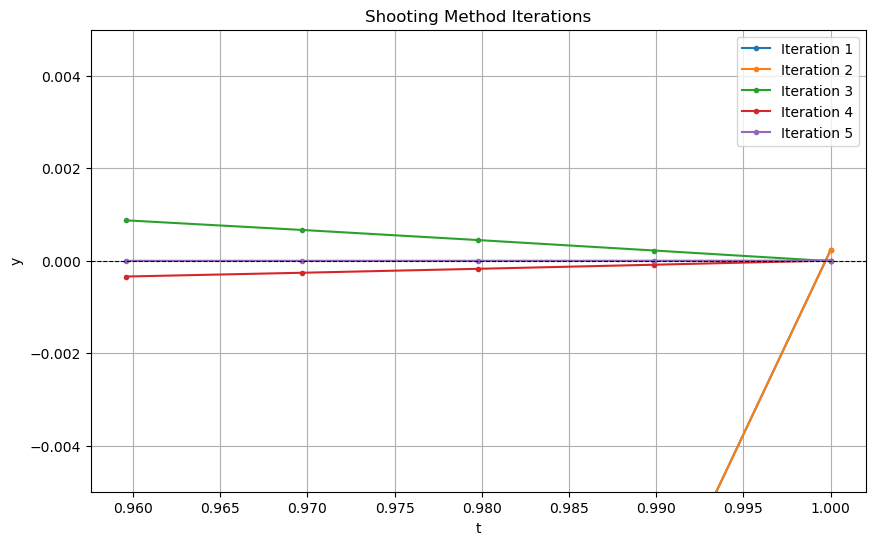

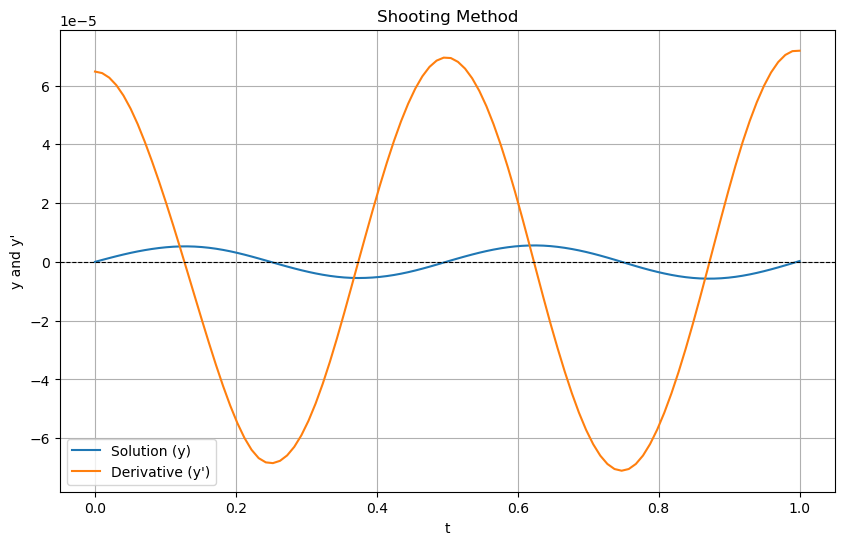

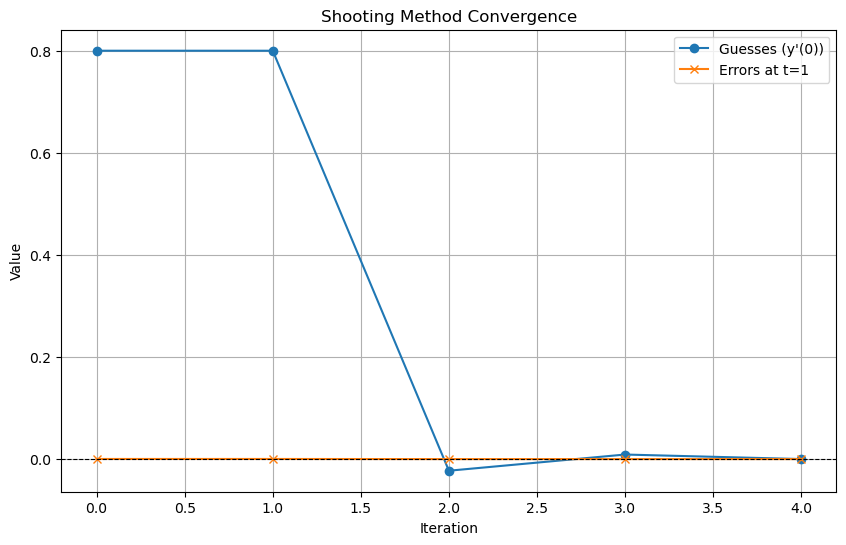

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Define the differential equation y'' = -n^2 \pi^2 y as a first-order system
def ODE(t, y):
    n = 4
    return [y[1], -n * n * np.pi * np.pi * y[0]]

# Function to compute the shooting method
def shooting_method(f, t_span, y0_guess, target, boundary, max_iter=10, tol=1e-6):
    guesses = [y0_guess]
    errors = []

    plt.figure(figsize=(10, 6))
    
    for i in range(max_iter):
        sol = solve_ivp(
            f, t_span, [boundary[0], guesses[-1]], t_eval=np.linspace(*t_span, 100)
        )
        error = sol.y[0, -1] - boundary[1]
        errors.append(error)

        # Plot the solution of the current iteration
 
        plt.plot(sol.t[-5:], sol.y[0,-5:], marker='.',label=f"Iteration {i+1}")
        plt.ylim(-0.005,0.005)
    

        if abs(error) < tol:
            plt.title("Shooting Method Iterations")
            plt.xlabel("t")
            plt.ylabel("y")
            plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
            plt.legend()
            plt.grid()
            plt.show()
            return sol, guesses, errors

        # Adjust the initial slope (guess) using a simple secant method approach
        if len(guesses) > 1:
            delta = (guesses[-1] - guesses[-2]) / (errors[-1] - errors[-2])
            new_guess = guesses[-1] - error * delta
        else:
            new_guess = guesses[-1] - 0.1 * error  # Initial adjustment

        guesses.append(new_guess)

    plt.title("Shooting Method Iterations")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.legend()
    plt.grid()
    plt.show()
    
    raise RuntimeError("Shooting method did not converge.")

# Define the problem
t_span = (0, 1.0)
boundary_conditions = (0, 0)  # y(0) = 0, y(1) = 0
initial_slope_guess = 0.8  # Initial guess for y'(0)

# Apply the shooting method
try:
    solution, guesses, errors = shooting_method(
        ODE, t_span, initial_slope_guess, 0, boundary_conditions
    )
except RuntimeError as e:
    print(e)
    solution = None

# Plot the final results
if solution:
    plt.figure(figsize=(10, 6))
    plt.plot(solution.t, solution.y[0], label="Solution (y)")
    plt.plot(solution.t, solution.y[1], label="Derivative (y')")
    plt.title("Shooting Method")
    plt.xlabel("t")
    plt.ylabel("y and y'")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot guesses and errors
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(guesses)), guesses, marker="o", label="Guesses (y'(0))")
    plt.plot(range(len(errors)), errors, marker="x", label="Errors at t=1")
    plt.title("Shooting Method Convergence")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.legend()
    plt.grid()
    plt.show()

## TODO
1. Change $n$ in the ODE function to see how the solution changes. 
2. Change the initial guess for the slope and see how the solution changes.
3. Change the magnitude of `tol` and see how the convergence changes.

## Poissoin Equation Solver
The code below solves the Poisson equation ona unit square with zero boundary conditions.



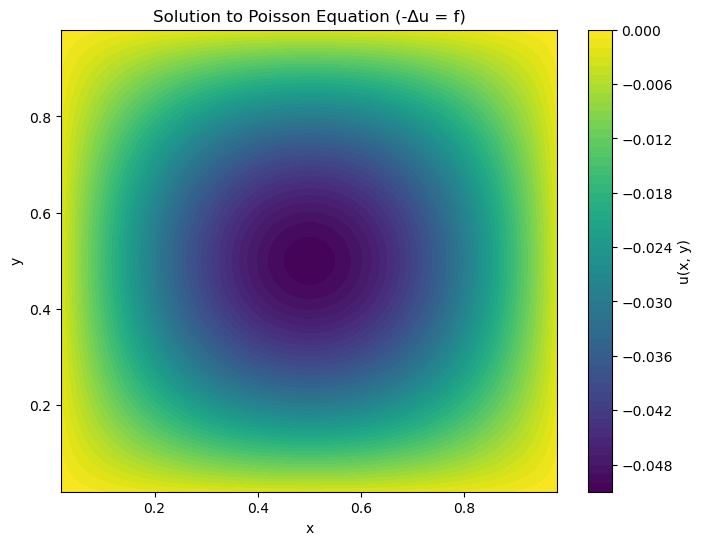

In [15]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def solve_poisson(N, f):
    """
    Solve the Poisson equation -∆u = f on a unit square with zero boundary conditions.
    
    Parameters:
        N (int): Number of interior grid points per dimension (NxN grid).
        f (function): Source term as a function of (x, y).
    
    Returns:
        u (2D numpy array): Solution on the grid including boundaries.
    """
    # Grid spacing
    h = 1 / (N + 1)
    
    # Create grid points
    x = np.linspace(h, 1 - h, N)
    y = np.linspace(h, 1 - h, N)
    X, Y = np.meshgrid(x, y)

    # Compute the source term at interior points
    F = f(X, Y).flatten()

    # Generate the finite difference matrix
    diagonal = -4 * np.ones(N**2)
    off_diag = np.ones(N**2 - 1)
    off_diag[np.arange(1, N) * N - 1] = 0  # Handle non-periodic boundary conditions
    off_diag_far = np.ones(N**2 - N)
    
    diagonals = [diagonal, off_diag, off_diag, off_diag_far, off_diag_far]
    offsets = [0, -1, 1, -N, N]
    A = diags(diagonals, offsets, shape=(N**2, N**2), format="csr") / h**2

    # Solve the linear system
    u_flat = spsolve(A, F)

    # Reshape solution into 2D and add boundaries
    u = np.zeros((N + 2, N + 2))
    u[1:-1, 1:-1] = u_flat.reshape((N, N))
    
    return u, X, Y

# Define the source term
def source_term(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

# Solve the problem
N = 50  # Number of interior points
u, X, Y = solve_poisson(N, source_term)

# Plot the solution
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u[1:-1, 1:-1], levels=50, cmap="viridis")
plt.colorbar(label="u(x, y)")
plt.title("Solution to Poisson Equation (-∆u = f)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## TODO
 Change the function form of the source term and see how the solution changes. Notice that your source term has to satisfy the boundary conditions.
 